## MDP Formulation
### State space
$S = \{(t_j, x_i)\}_{0\leq i\leq C \\ 0\leq j\leq T}$ with $x$ the number of bookings made and $t$ the number of micro-times since the opening of the bookings.  

### Action space
$A = \{p_1, p_2, ..., p_n\}$ with $p_1 < ... < p_n$ the prices.

### Model Dynamics

If the agent is in $s = (x, t)$ and executes the action $p$ then:  
- $s' = (x+1, t+1)$ and $r = p$ with a probability equal to $\lambda(t)e^{-\alpha(t)(\frac{p}{p_1}-1)} $  
- $s' = (x, t+1)$ and $r = 0$ with a probability equal to  $1-\lambda(t)e^{-\alpha(t)(\frac{p}{p_1}-1)} $  

The game ends when $t = 0$ or $x = 0$.  
### Parameters
- $T = 500$, $C = 50$
- $A = \{50, 70, 90, 110, 130, 150, 170, 190, 210, 230\}$
- $\lambda(t) = \lambda = 0.2$
- $\alpha(t) = \alpha = 0.66$  

## Visualization

### Demand and Revenue
It is interesting to visualize how the demand and the revenue are impacted by the prices for different values of $\alpha$  
In this simplified simulation the demand $D$ and the revenue $R$ do not depend on time so $D(p) = C.e^{-\alpha(\frac{p}{p_1}-1)}$ and $R(p) = p.D(p) = p.C.e^{-\alpha(\frac{p}{p_1}-1)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C = 50
A = [k for k in range(50, 230, 20)]

def plot_demand(A, C, alpha):
    D = [C*np.exp(-alpha*((p/A[0]) - 1)) for p in A]   
    plt.title("Demand, alpha = "+str(alpha))
    plt.xlabel("Prices")
    plt.grid()
    return plt.plot(A, D, 'r')

def plot_revenue(A, C, alpha):
    R = [p*C*np.exp(-alpha*((p/A[0]) - 1)) for p in A]
    plt.title("Revenue, alpha = "+str(alpha))
    plt.xlabel("Prices")
    plt.grid()
    return plt.plot(A, R, 'b')

plt.figure(1)
alpha = 0.1
plt.subplot(1, 2, 1); plot_demand(A, C, alpha)
plt.subplot(1, 2, 2); plot_revenue(A, C, alpha)
plt.figure(2)
alpha = 0.66
plt.subplot(1, 2, 1); plot_demand(A, C, alpha)
plt.subplot(1, 2, 2); plot_revenue(A, C, alpha)
plt.figure(3)
alpha = 0.9
plt.subplot(1, 2, 1); plot_demand(A, C, alpha)
plt.subplot(1, 2, 2); plot_revenue(A, C, alpha)
plt.show()

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

A value of $\alpha$ very close to $0$ means that the customers are not at all sensitive to prices. We can thus see that the demand decreases linearly as the prices increase and that to maximize the revenue we would need to set the prices at the highest possible price. On the contrary if $\alpha$ is very close to $1$ then it means that the customers are very sensitive to prices. Indeed it looks like the demand decreases exponentially as the prices increase and to maximize the revenue we would need to set the prices to the lowest possible price.  
We decided to set $\alpha$ to $0.4$ since with this value the price that maximizes the revenue is situated in between the lowest and highest prices and it is thus an interesting case to study.
### Value Iteration

In [2]:
%run ../value_iteration.py


In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt

max_iter = 100000
epsilon = 1e-20
gamma = 0.99
env = gym.make('gym_RM:RM-v0')
env = env.unwrapped
T, C = 50, 10
v = value_iteration(env, gamma, max_iter, epsilon)

Converged at 49


#### Visualization of the values

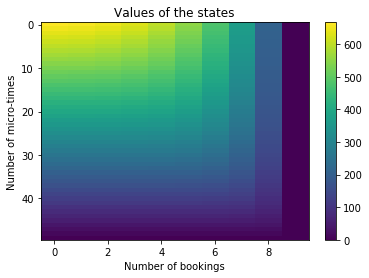

In [5]:
%run ../visualization_and_metrics.py
visualisation_value_RM(v, T, C) 


#### Visualization of the optimal policy


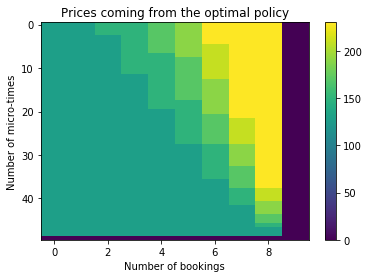

In [7]:
%run ../visualization_and_metrics.py
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, T, C)


### Dynamic programming

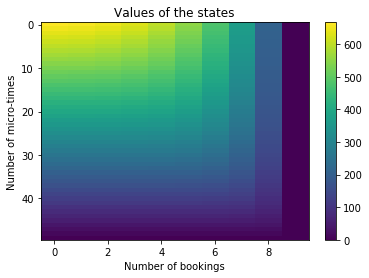

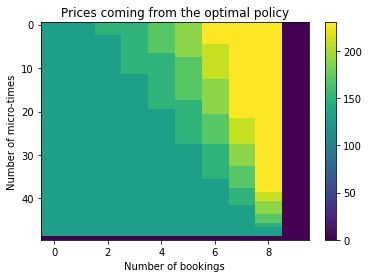

In [16]:
%run ../dynamic_programming.py
%run ../visualization_and_metrics.py
prices = [k for k in range(50, 231, 20)]
alpha, lamb = 0.4, 0.2
v, policy = dynamic_programming(T, C, alpha, lamb, prices)
visualisation_value_RM(v, T, C)
visualize_policy_RM(policy, T, C)

### Q-Learning

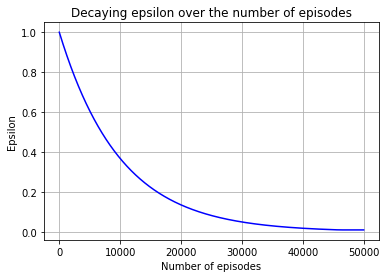

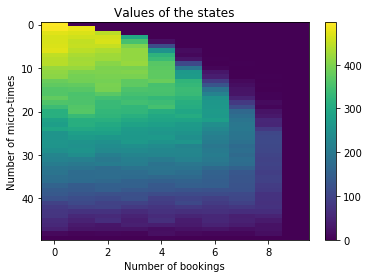

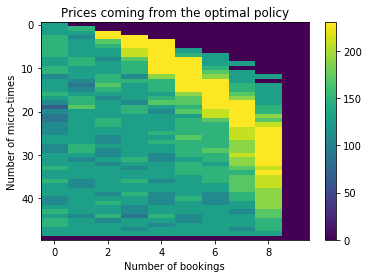

In [10]:
%run ../visualization_and_metrics.py
%run ../q_learning.py

alpha, gamma = 0.07, 0.99
nb_episodes, nb_steps = 50000, 10000
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.9999

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
q_table, rList = q_learning(env, alpha, gamma, nb_episodes, nb_steps, epsilon, epsilon_min, epsilon_decay)
v = q_to_v(env, q_table)
visualisation_value_RM(v, T, C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, T, C)